In [1]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
import pingouin as pg
import reliability_stability
%matplotlib inline

In [2]:
def isnumber(x):
    try:
        int(x)
        return True
    except:
        return False

In [3]:
raft = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\raft_data_3-nodes.csv", error_bad_lines=False, sep=",")
paxos = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\paxos_data_3-nodes.csv", error_bad_lines=False, sep=",")
noAlg = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\experiments\\latency\\outdoor_latency_experiment\\control\\outdoor_contol_3-nodes\\data.csv", error_bad_lines=False, sep=",")

b'Skipping line 33: expected 8 fields, saw 9\nSkipping line 420: expected 8 fields, saw 9\nSkipping line 612: expected 8 fields, saw 9\nSkipping line 790: expected 8 fields, saw 9\nSkipping line 1432: expected 8 fields, saw 9\n'


In [4]:
raft.shape

(2963, 8)

In [5]:
paxos.shape

(2974, 8)

In [6]:
noAlg.shape

(1814, 8)

In [7]:
raft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2963 non-null   object 
 1   packetNumber  2963 non-null   object 
 2   temperature   2962 non-null   float64
 3   brightness    2940 non-null   float64
 4   humidity      2940 non-null   float64
 5   onBoardTemp   2940 non-null   object 
 6   sent          2940 non-null   object 
 7   received      2938 non-null   float64
dtypes: float64(4), object(4)
memory usage: 185.3+ KB


In [8]:
paxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      2974 non-null   object 
 1   packetNumber  2974 non-null   object 
 2   temperature   2974 non-null   object 
 3   brightness    2951 non-null   object 
 4   humidity      2951 non-null   object 
 5   onBoardTemp   2950 non-null   object 
 6   sent          2950 non-null   object 
 7   received      2950 non-null   float64
dtypes: float64(1), object(7)
memory usage: 186.0+ KB


In [9]:
noAlg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodeName      1814 non-null   object 
 1   packetNumber  1814 non-null   object 
 2   temperature   1807 non-null   object 
 3   brightness    1797 non-null   object 
 4   humidity      1782 non-null   object 
 5   onBoardTemp   1763 non-null   object 
 6   sent          1746 non-null   object 
 7   received      1725 non-null   float64
dtypes: float64(1), object(7)
memory usage: 113.5+ KB


In [10]:
raft[raft.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,2,1,22.0,172.0,42.0,21,706472399487,7.064724e+11
1,3,1,21.0,97.0,46.0,22,706472400913,7.064724e+11
2,2,2,21.0,189.0,42.0,21,706472410004,7.064724e+11
3,3,2,20.0,106.0,46.0,22,706472411431,7.064724e+11
4,2,3,21.0,188.0,42.0,21,706472420521,7.064724e+11
...,...,...,...,...,...,...,...,...
2958,3,998,21.0,0.0,44.0,22,706482855115,7.064829e+11
2959,1,998,22.0,0.0,37.0,23,706482864223,7.064829e+11
2960,3,999,21.0,65535.0,44.0,22,706482865633,7.064829e+11
2961,1,999,22.0,0.0,37.0,23,706482874741,7.064829e+11


In [11]:
paxos[paxos.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,1,2,22,65535,38,23,706484115659,7.064841e+11
1,2,1,22,0,41,21,706484118292,7.064841e+11
2,NaN,706484126182,706484127272,NaN,NaN,NaN,NaN,NaN
3,2,2,22,0,41,21,706484128810,7.064841e+11
4,3,1,21,0,47,21,706484129178,7.064841e+11
...,...,...,...,...,...,...,...,...
2969,2,998,22,0,42,22,706494604095,7.064946e+11
2970,3,989,21,65535,49,22,706494605914,7.064946e+11
2971,1,1000,22,0,42,23,706494612848,7.064946e+11
2972,2,999,22,65535,42,22,706494614613,7.064946e+11


In [12]:
noAlg[noAlg.applymap(isnumber)]

,nodeName,packetNumber,temperature,brightness,humidity,onBoardTemp,sent,received
0,2,2,21,404,38,22,706621708234,7.066217e+11
1,NaN,706621709426,706621709878,NaN,NaN,NaN,NaN,NaN
2,2,4,21,401,38,22,706621710949,7.066217e+11
3,2,5,22,400,38,22,706621712958,7.066217e+11
4,3,10,2,400,38,22,706621714165,7.066217e+11
...,...,...,...,...,...,...,...,...
1809,2,1000,21,388,35,24,706623217339,7.066232e+11
1810,3,997,21,184,43,24,706623218856,7.066232e+11
1811,3,998,22,185,43,24,706623220864,7.066232e+11
1812,3,999,22,167,43,24,706623221871,7.066232e+11


In [13]:
raft_dropna=raft.dropna()

In [14]:
raft_dropna.shape

(2938, 8)

In [15]:
paxos_dropna=paxos.dropna()

In [16]:
paxos_dropna.shape

(2950, 8)

In [17]:
noAlg_dropna=noAlg.dropna()

In [18]:
noAlg_dropna.shape

(1725, 8)

In [19]:
raft_timings = raft_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [20]:
paxos_timings = paxos_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [21]:
noAlg_timings = noAlg_dropna.drop(columns=['nodeName','packetNumber','temperature','brightness','humidity','onBoardTemp'])

In [22]:
raft_timings_coerce = raft_timings.apply(pd.to_numeric, errors = 'coerce')

In [23]:
paxos_timings_coerce= paxos_timings.apply(pd.to_numeric, errors = 'coerce')

In [24]:
noAlg_timings_coerce= noAlg_timings.apply(pd.to_numeric, errors = 'coerce')

In [25]:
raft_timings_coerce_dropna=raft_timings_coerce.dropna()

In [26]:
paxos_timings_coerce_dropna=paxos_timings_coerce.dropna()

In [27]:
noAlg_timings_coerce_dropna=noAlg_timings_coerce.dropna()

In [28]:
raft_timings_coerce_dropna.shape

(2933, 2)

In [29]:
paxos_timings_coerce_dropna.shape

(2942, 2)

In [30]:
noAlg_timings_coerce_dropna.shape

(1682, 2)

In [31]:
raft_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2962
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2933 non-null   float64
 1   received  2933 non-null   float64
dtypes: float64(2)
memory usage: 68.7 KB


In [32]:
paxos_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 2973
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2942 non-null   float64
 1   received  2942 non-null   float64
dtypes: float64(2)
memory usage: 69.0 KB


In [33]:
noAlg_timings_coerce_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1813
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1682 non-null   float64
 1   received  1682 non-null   float64
dtypes: float64(2)
memory usage: 39.4 KB


In [34]:
raft_timings_redone = {'sent': [],'received':[]}

raft_result_redone = pd.DataFrame(raft_timings_redone)

In [35]:
paxos_timings_redone = {'sent': [],'received':[]}

paxos_result_redone = pd.DataFrame(paxos_timings_redone)

In [36]:
noAlg_timings_redone = {'sent': [],'received':[]}

noAlg_result_redone = pd.DataFrame(noAlg_timings_redone)

In [37]:
for index, row in raft_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > raft_timings_coerce_dropna['sent'].iloc[0]):
            
            raft_result_redone.at[index, 'sent'] = int(row['sent'])
            raft_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [38]:
for index, row in paxos_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > paxos_timings_coerce_dropna['sent'].iloc[0]):
            
            paxos_result_redone.at[index, 'sent'] = int(row['sent'])
            paxos_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [39]:
for index, row in noAlg_timings_coerce_dropna.iterrows():
    try: 
        if(int(row['received']) > int(row['sent']) and int(row['sent']) > noAlg_timings_coerce_dropna['sent'].iloc[0]):
            
            noAlg_result_redone.at[index, 'sent'] = int(row['sent'])
            noAlg_result_redone.at[index, 'received'] = int(row['received'])
    except:
        pass
        #print('error')

In [40]:
raft_result_redone.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2931 entries, 1 to 2962
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2931 non-null   float64
 1   received  2931 non-null   float64
dtypes: float64(2)
memory usage: 148.7 KB


In [41]:
paxos_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 1 to 2971
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      2084 non-null   float64
 1   received  2084 non-null   float64
dtypes: float64(2)
memory usage: 128.8 KB


In [42]:
noAlg_result_redone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 2 to 1809
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sent      1182 non-null   float64
 1   received  1182 non-null   float64
dtypes: float64(2)
memory usage: 67.7 KB


In [43]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=raft_result_redone)

(0.9999999984305896, array([1., 1.]))

In [44]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=paxos_result_redone)

(0.9999999969368298, array([1., 1.]))

In [45]:
#CRONBACH ALPHA
pg.cronbach_alpha(data=noAlg_result_redone)

(0.9999999805126312, array([1., 1.]))

In [46]:
raft_latency_pd = {'latency': []}

raft_latency = pd.DataFrame(raft_latency_pd)

In [47]:
paxos_latency_pd = {'latency': []}

paxos_latency = pd.DataFrame(paxos_latency_pd)

In [48]:
noAlg_latency_pd = {'latency': []}

noAlg_latency = pd.DataFrame(noAlg_latency_pd)

In [49]:
for index, row in raft_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        raft_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [50]:
for index, row in paxos_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        paxos_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [51]:
for index, row in noAlg_result_redone.iterrows():
    try:
        
        result = int(row['received']) - int(row['sent'])
        noAlg_latency.at[index, 'latency'] = result      
    except:
        pass
        

In [52]:
raft_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2931 entries, 1 to 2962
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  2931 non-null   float64
dtypes: float64(1)
memory usage: 125.8 KB


In [53]:
raft_latency.shape

(2931, 1)

In [54]:
paxos_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084 entries, 1 to 2971
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  2084 non-null   float64
dtypes: float64(1)
memory usage: 112.6 KB


In [55]:
paxos_latency.shape

(2084, 1)

In [56]:
noAlg_latency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 2 to 1809
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   latency  1182 non-null   float64
dtypes: float64(1)
memory usage: 58.5 KB


In [57]:
noAlg_latency.shape

(1182, 1)

In [58]:
raft_latency['latency'].mean()

605.0440122824974

In [59]:
paxos_latency['latency'].mean()

409.4596928982726

In [60]:
noAlg_latency['latency'].mean()

378.1615905245347

In [61]:
pwd

'C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook'

In [74]:
latency_3 = pd.read_csv("C:\\Users\\czaps\\Documents\\MSc\\data_wrangling\\latency_workbook\\latency_3.csv", error_bad_lines=False, sep=",")

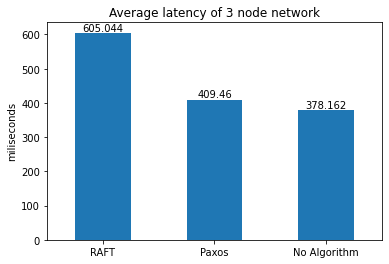

In [75]:
ax = latency_3.plot.bar(x='algorithm')
plt.title('Average latency of 3 node network')
ax.set(xlabel='', ylabel='miliseconds')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
for bars in ax.containers:
    ax.bar_label(bars)
#plt.legend(loc='upper right')
ax.get_legend().remove()
plt.savefig('C:\\Users\\czaps\\Documents\\MSc\\images\\latency_3_mean.png', bbox_inches='tight')
